<span style="color:blue"> Please look at the pdf file for better understanding of these code. 


Prediction before training: f(8)=0.000
epoch1: w=1.200, loss= 30.00000000
epoch3: w=1.872, loss= 0.76800019
epoch5: w=1.980, loss= 0.01966083
epoch7: w=1.997, loss= 0.00050331
epoch9: w=1.999, loss= 0.00001288
epoch11: w=2.000, loss= 0.00000033
epoch13: w=2.000, loss= 0.00000001
epoch15: w=2.000, loss= 0.00000000
Prediction after training for 15 epochs : f(8) = 16.000


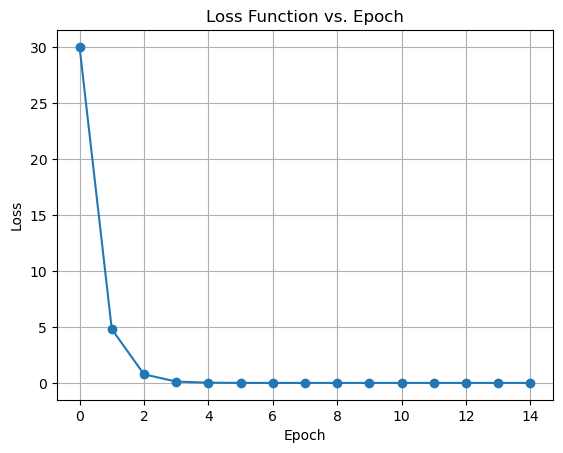

In [1]:
#This is an example of using linear regression model to make prediction analytically(meaning without using any pytorch model just yet) 

import numpy as np 
import matplotlib.pyplot as plt

#input variable x with actual result y_actual corresponsing to each x
x=np.array([1,2,3,4], dtype=np.float32)
y_actual=np.array([2,4,6,8], dtype=np.float32)

#initialize the weight to 0; you can use any number but 0 is good
w=0.0

#model prediction
def forward(x): 
    return w*x

#loss =MSE
def loss(y_actual,y_predicted):
    return((y_predicted-y_actual)**2).mean()

#gradient : 
def gradient(x,y_actual,y_predicted):
    return np.dot(2*x,y_predicted-y_actual).mean()

print(f'Prediction before training: f(8)={forward(8):.3f}')

#Training
learning_rate = 0.01
n_iters=15
loss_values=[]
for epoch in range(n_iters):
    #prediction=forward pass 
    y_pred=forward(x)

    #loss
    l=loss(y_actual,y_pred)
    loss_values.append(l.item())
    #gradient
    dw=gradient(x,y_actual,y_pred)

    #update weights
    w-=learning_rate*dw
    
    if epoch %2==0:
        print(f'epoch{epoch+1}: w={w:.3f}, loss= {l:.8f}')

print(f'Prediction after training for {n_iters} epochs : f(8) = {forward(8):.3f}')

plt.plot( loss_values, marker='o')
plt.title('Loss Function vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
    

    
    

<span style="color:blue">This method of doing the prediction is analytical.This is the most accurate it can get and the model converses to correct value very quickly. Next, we will replace the gradient function by loss.backward/w.grad module in pytorch by keeping everything else same. 

Prediction before training: f(5)=0.000
epoch1: w=0.300, loss= 30.00000000
epoch3: w=0.772, loss= 15.66018772
epoch5: w=1.113, loss= 8.17471695
epoch7: w=1.359, loss= 4.26725292
epoch9: w=1.537, loss= 2.22753215
epoch11: w=1.665, loss= 1.16278565
epoch13: w=1.758, loss= 0.60698116
epoch15: w=1.825, loss= 0.31684780
epoch17: w=1.874, loss= 0.16539653
epoch19: w=1.909, loss= 0.08633806
epoch21: w=1.934, loss= 0.04506890
epoch23: w=1.952, loss= 0.02352631
epoch25: w=1.966, loss= 0.01228084
epoch27: w=1.975, loss= 0.00641066
epoch29: w=1.982, loss= 0.00334642
epoch31: w=1.987, loss= 0.00174685
epoch33: w=1.991, loss= 0.00091188
epoch35: w=1.993, loss= 0.00047601
Prediction after training for 35 epochs : f(5) = 9.966


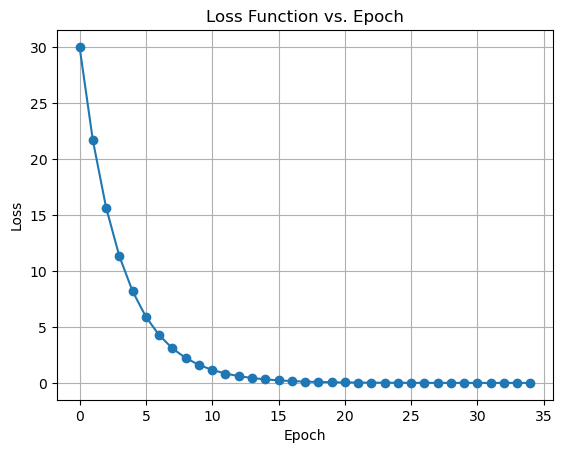

In [2]:
import torch


#instead of numpy 
x=torch.tensor([1,2,3,4], dtype=torch.float32)
y_actual=torch.tensor([2,4,6,8], dtype=torch.float32)

w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

#model prediction
def forward(x): 
    return w*x

#loss =MSE

def loss(y_actual,y_predicted):
    return((y_predicted-y_actual)**2).mean()

#gradient : 
def gradient(x,y_actual,y_predicted):
    return np.dot(2*x,y_predicted-y_actual).mean()

print(f'Prediction before training: f(5)={forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters=35
loss_values=[]
for epoch in range(n_iters):
    #prediction=forward pass 
    y_pred=forward(x)

    #loss
    l=loss(y_actual,y_pred)
    loss_values.append(l.item())
    #gradient= Backward pass
    l.backward() #dl/dw

    #update weights
    with torch.no_grad():
        w-=learning_rate*w.grad

    #zero gradient
    w.grad.zero_()
    
    if epoch %2==0:
        print(f'epoch{epoch+1}: w={w:.3f}, loss= {l:.8f}')

print(f'Prediction after training for {n_iters} epochs : f(5) = {forward(5):.3f}')

    
plt.plot( loss_values, marker='o')
plt.title('Loss Function vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

    
    

<span style="color:blue"> At home, replace the the loss function by pytorch module (loss=torch.nn.MSELoss) and plot the loss function vs epoch plot to see how long it takes to converge to lowest value. We will discuss this in our next meeting. 

Prediction before training: f(5)=0.000
epoch1: w=0.300, loss= 30.00000000
epoch3: w=0.772, loss= 15.66018772
epoch5: w=1.113, loss= 8.17471695
epoch7: w=1.359, loss= 4.26725292
epoch9: w=1.537, loss= 2.22753215
epoch11: w=1.665, loss= 1.16278565
epoch13: w=1.758, loss= 0.60698116
epoch15: w=1.825, loss= 0.31684780
epoch17: w=1.874, loss= 0.16539653
epoch19: w=1.909, loss= 0.08633806
epoch21: w=1.934, loss= 0.04506890
epoch23: w=1.952, loss= 0.02352631
epoch25: w=1.966, loss= 0.01228084
epoch27: w=1.975, loss= 0.00641066
epoch29: w=1.982, loss= 0.00334642
epoch31: w=1.987, loss= 0.00174685
epoch33: w=1.991, loss= 0.00091188
epoch35: w=1.993, loss= 0.00047601
epoch37: w=1.995, loss= 0.00024848
epoch39: w=1.996, loss= 0.00012971
epoch41: w=1.997, loss= 0.00006770
epoch43: w=1.998, loss= 0.00003534
epoch45: w=1.999, loss= 0.00001845
epoch47: w=1.999, loss= 0.00000963
epoch49: w=1.999, loss= 0.00000503
epoch51: w=1.999, loss= 0.00000262
epoch53: w=2.000, loss= 0.00000137
epoch55: w=2.000, l

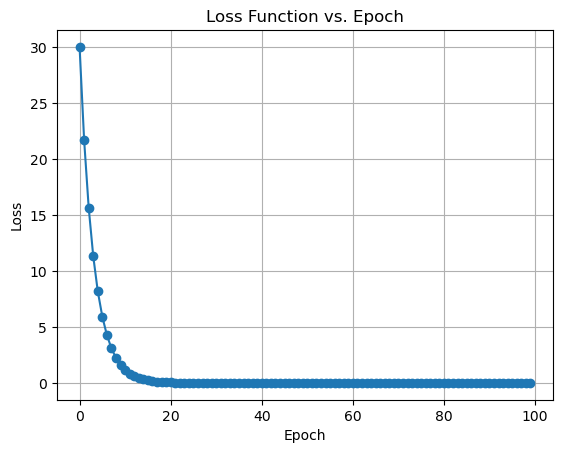

In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

#instead of numpy 
x=torch.tensor([1,2,3,4], dtype=torch.float32)
y_actual=torch.tensor([2,4,6,8], dtype=torch.float32)

w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

#model prediction
def forward(x): 
    return w*x

#loss =MSE

#def loss(y_actual,y_predicted):
    #return((y_predicted-y_actual)**2).mean()

loss=torch.nn.MSELoss()

#gradient : 
def gradient(x,y_actual,y_predicted):
    return np.dot(2*x,y_predicted-y_actual).mean()

print(f'Prediction before training: f(5)={forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters=100
loss_values=[]
for epoch in range(n_iters):
    #prediction=forward pass 
    y_pred=forward(x)

    #loss
    l=loss(y_actual,y_pred)
    loss_values.append(l.item())
    #gradient= Backward pass
    l.backward() #dl/dw

    #update weights
    with torch.no_grad():
        w-=learning_rate*w.grad

    #zero gradient
    w.grad.zero_()
    
    if epoch %2==0:
        print(f'epoch{epoch+1}: w={w:.3f}, loss= {l:.8f}')

print(f'Prediction after training for {n_iters} epochs : f(5) = {forward(5):.3f}')

    
plt.plot( loss_values, marker='o')
plt.title('Loss Function vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

    
    